# Anomaly Detection in a Blockchain - Model training  
    
    We know that fraudulent transactions are very less in number as due to novelty of the Bitcoin network, only a limited number of transactions have been reported as fraud.

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

In [2]:
df=pd.read_csv("Blockchain.csv")

In [3]:
df

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...
2916692,0,0.111111,1,0,1,1.255809e+09,white
2916693,0,1.000000,1,0,1,4.409699e+07,white
2916694,2,12.000000,6,6,35,2.398267e+09,white
2916695,0,0.500000,1,0,1,1.780427e+08,white


## Step 2: Feature Engineering

In [4]:
df.shape

(2916697, 7)

In [5]:
df.head()

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


In [6]:
df.describe()

,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [7]:
df["label"].value_counts()

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

So only a small fraction of transactions are fraudulent. Our anomaly detection can work well.

In [8]:
categorical_cols=df.select_dtypes(include="object").columns

In [9]:
numerical_cols=df.select_dtypes(include="number").columns

In [10]:
df.isnull().sum()

length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [11]:
old_df=df.copy()

In [12]:
for col in df.columns[:-1]:
    df[col]=df[col]

In [13]:
X=df.drop(columns=["label"])
y=df["label"]

In [14]:
X.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')

In [15]:
df.head()

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


In [16]:
new_df=pd.DataFrame()
grouped=df.groupby("label")

In [17]:
new_df["num_of_instances"]=grouped.size()

In [18]:
df.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label'], dtype='object')

In [19]:
for col in X.columns:
    new_df[f"{col}_avg"]=grouped[col].mean()

In [20]:
new_df.shape

(29, 7)

In [21]:
new_df.head()

,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg
label,,,,,,,
montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08
montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08
montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07
montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08
montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09


## Step 3: Standard Deviation

In [22]:
for col in X.columns:
    new_df[f"{col}_std"]=grouped[col].agg(np.std).fillna(0)

#### 3.1 Minimum

In [23]:
for col in X.columns:
    new_df[f"{col}_min"]=grouped[col].min()

#### 3.2 Maximum

In [24]:
for col in X.columns:
    new_df[f"{col}_max"]=grouped[col].max()

In [25]:
new_df=new_df.reset_index()
new_df.head()

,label,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg,length_std,weight_std,...,count_min,looped_min,neighbors_min,income_min,length_max,weight_max,count_max,looped_max,neighbors_max,income_max
0,montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08,73.145434,0.600596,...,1,0,1,57142857.0,144,1.666667,8076,8073,6,1.088599e+09
1,montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08,0.000000,0.000000,...,1241,0,2,203320001.0,144,0.051214,1241,0,2,2.033200e+08
2,montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07,68.747987,0.410909,...,1,0,2,30000000.0,144,1.000000,3191,0,2,5.030000e+07
3,montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08,58.187904,0.434143,...,1,0,1,30000000.0,144,3.458951,9262,8489,15,1.080000e+09
4,montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09,50.731602,1.555608,...,1,0,1,30000000.0,144,31.108593,6423,6418,79,4.450000e+11


## Step 4: Undersampling

    We undersample the data to 200000 samples by keeping the minority samples (ransomware) and undersampling the majority (white transactions).

In [26]:
black_rows=df[df["label"]!="white"]

In [27]:
white_sample=df[df["label"]=="white"].sample(n=158587,random_state=42)

In [28]:
sampled_df=pd.concat([black_rows,white_sample]).sample(frac=1,random_state=50)
sampled_df.head()

,length,weight,count,looped,neighbors,income,label
526724,14,0.003906,1,0,2,3.216000e+09,white
2825235,144,0.196970,1805,0,2,5.578352e+07,white
7558,14,0.015625,1,0,2,6.355311e+08,montrealCryptoLocker
1141393,6,1.000000,1,0,2,2.925100e+08,white
1484054,142,0.065711,2568,0,2,1.360000e+08,white


## Step 5: Label Encoding
    We do label encoding of:
> * White label: 0
> * Ransomware: 1

In [29]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the labels
sampled_df['label'] = label_encoder.fit_transform(sampled_df['label'])

# Map 'white' to 0 and other values to 1
sampled_df['label'] = sampled_df['label'].apply(lambda x: 0 if x == label_encoder.transform(['white'])[0] else 1)

sampled_df['label']


526724     0
2825235    0
7558       1
1141393    0
1484054    0
          ..
1363905    0
1934713    0
2481475    0
2039010    0
880386     0
Name: label, Length: 200000, dtype: int64

## Step 6: Z-score Anomaly Filteration
    We calculate the 'Z-score' and filter out the 'anomalies' as per a threshold.

In [30]:
z_score_df=pd.DataFrame()
for col in sampled_df.columns:
    z_score_df[f"{col}_z_score"]=(sampled_df[col]-sampled_df[col].mean())/sampled_df[col].std()
z_score_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
526724,-0.513441,-0.114174,-0.424426,-0.234473,-0.009561,-0.004920,-0.511015
2825235,1.695481,-0.075626,0.677535,-0.234473,-0.009561,-0.028981,-0.511015
7558,-0.513441,-0.111834,-0.424426,-0.234473,-0.009561,-0.024567,1.956881
1141393,-0.649374,0.084711,-0.424426,-0.234473,-0.009561,-0.027178,-0.511015
1484054,1.661498,-0.101834,1.143608,-0.234473,-0.009561,-0.028370,-0.511015


In [31]:
import pandas as pd

# Filter the columns based on the condition
filtered_df = z_score_df[z_score_df.apply(lambda row: all(-3 <= val <= 3 for val in row), axis=1)]

# Display the filtered columns' data
filtered_df.head()


,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
526724,-0.513441,-0.114174,-0.424426,-0.234473,-0.009561,-0.004920,-0.511015
2825235,1.695481,-0.075626,0.677535,-0.234473,-0.009561,-0.028981,-0.511015
7558,-0.513441,-0.111834,-0.424426,-0.234473,-0.009561,-0.024567,1.956881
1141393,-0.649374,0.084711,-0.424426,-0.234473,-0.009561,-0.027178,-0.511015
1484054,1.661498,-0.101834,1.143608,-0.234473,-0.009561,-0.028370,-0.511015


## Step 7: Train Test Split
> * Training data: 66% 
> * Test data: 33%

In [32]:
X=sampled_df.drop("label",axis=1)
y=(sampled_df["label"]>0).astype('int')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.33, 
                                   shuffle=True)
  

## Step 8: Standardization
    We perform 'normalization' on the train data and then scale test data accordingly.

In [34]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Step 9: Model Training

    We use the 'XGBoost Classifier' to train on our dataset. 
    'Random search' is performed to optimize the hyperparameters of the classifier.
    
    Note: This might take few minutes to run.

In [35]:
# Define the XGBoost classifier
model = XGBClassifier()

# Define the hyperparameter search space
param_space = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Perform random search
random_search = RandomizedSearchCV(model, param_distributions=param_space, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)  # Pass the original NumPy arrays

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8324380584196349, 'learning_rate': 0.08906413602848162, 'max_depth': 7, 'n_estimators': 650, 'subsample': 0.9872174241197184}
Best score:  0.8403134328358209


## Step 10: Evaluation
    We use the following metrics for evaluation:
> * accuracy
> * precision
> * recall
> * f1 score

In [36]:
# Get the best model from random search
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

In [37]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
# Calculate the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.69
Recall: 0.42
F1 Score: 0.52


## Step 11: Evaluation Matrix

In [39]:
# Assuming you have your XGBoost classifier already trained and predictions made as 'y_pred_prob'
y_pred_prob = random_search.predict_proba(X_test_scaled)[:, 1]  # Assuming 'random_search' is your XGBoost classifier

In [40]:
# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

In [41]:
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

In [42]:
# Calculate the area under the precision-recall curve (AUC-PR) and ROC curve (AUC-ROC)
auc_pr = auc(recall, precision)
auc_roc = auc(fpr, tpr)

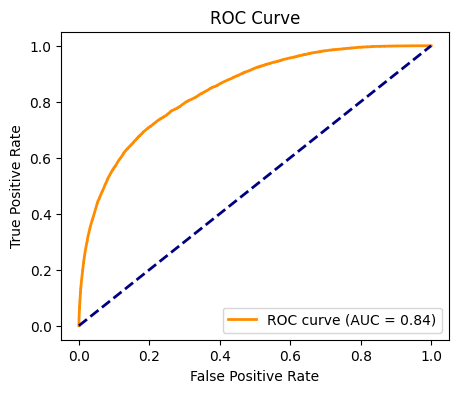

In [43]:
# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [73]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the evaluation metrics
print('---------------------------------------------')
print('                Model Report')
print('---------------------------------------------')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print('\n\nReport: This means that your model is able to \nidentify anomalous transactions with a high \ndegree of accuracy, while also being able to \nminimize false positives.')

---------------------------------------------
                Model Report
---------------------------------------------
Accuracy: 0.84
Precision: 0.69
Recall: 0.42
F1 Score: 0.52


Report: This means that your model is able to 
identify anomalous transactions with a high 
degree of accuracy, while also being able to 
minimize false positives.


ValueError: too many values to unpack (expected 2)